In [1]:
from nilearn import datasets
dataset = datasets.fetch_development_fmri(n_subjects=10)

# print basic information on the dataset
print('First subject functional nifti image (4D) is at: %s' %
      dataset.func[0])  # 4D data


Dataset created in C:\Users\junaid/nilearn_data\development_fmri


Dataset created in C:\Users\junaid/nilearn_data\development_fmri\development_fmri



 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (3 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (3 seconds, 0 min)


 ...done. (3 seconds, 0 min)


 ...done. (3 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (4 seconds, 0 min)


 ...done. (8 seconds, 0 min)


 ...done. (3 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (3 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (3 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (3 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


First subject functional nifti image (4D) is at: C:\Users\junaid/nilearn_data\development_fmri\development_fmri\sub-pixar123_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz


 ...done. (4 seconds, 0 min)


[Memory]0.0s, 0.0min    : Loading _filter_and_extract...


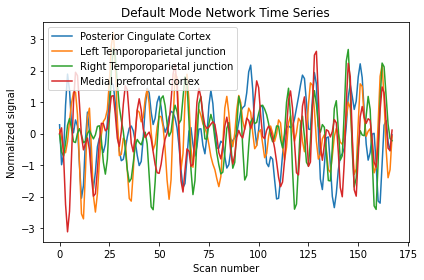

In [20]:
dmn_coords = [(0, -52, 18), (-46, -68, 32), (46, -68, 32), (1, 50, -5)]
labels = [
    'Posterior Cingulate Cortex',
    'Left Temporoparietal junction',
    'Right Temporoparietal junction',
    'Medial prefrontal cortex',
    ]


from nilearn import input_data

masker = input_data.NiftiSpheresMasker(
    dmn_coords, radius=8,
    detrend=True, standardize=True,
    low_pass=0.1, high_pass=0.01, t_r=2,
    memory='nilearn_cache', memory_level=1, verbose=2)

# Additionally, we pass confound information to ensure our extracted
# signal is cleaned from confounds.

func_filename = dataset.func[9]
confounds_filename = dataset.confounds[9]

time_series = masker.fit_transform(func_filename,
                                   confounds=[confounds_filename])

import matplotlib.pyplot as plt

for time_serie, label in zip(time_series.T, labels):
    plt.plot(time_serie, label=label)

plt.title('Default Mode Network Time Series')
plt.xlabel('Scan number')
plt.ylabel('Normalized signal')
plt.legend()
plt.tight_layout()


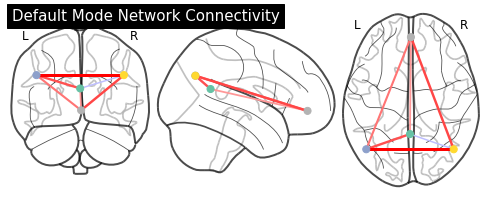

In [13]:
from nilearn.connectome import ConnectivityMeasure
connectivity_measure = ConnectivityMeasure(kind='partial correlation')
partial_correlation_matrix = connectivity_measure.fit_transform(
    [time_series])[0]


from nilearn import plotting

plotting.plot_connectome(partial_correlation_matrix, dmn_coords,
                         title="Default Mode Network Connectivity")

In [22]:
power = datasets.fetch_coords_power_2011()
print('Power atlas comes with {0}.'.format(power.keys()))
print("***********************************")
import numpy as np

coords = np.vstack((power.rois['x'], power.rois['y'], power.rois['z'])).T

print('Stacked power coordinates in array of shape {0}.'.format(coords.shape))
print("***********************************")

Power atlas comes with dict_keys(['rois', 'description']).
***********************************
Stacked power coordinates in array of shape (264, 3).
***********************************


Covariance matrix has shape (264, 264).


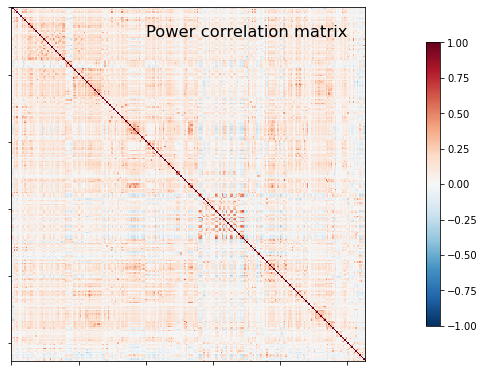

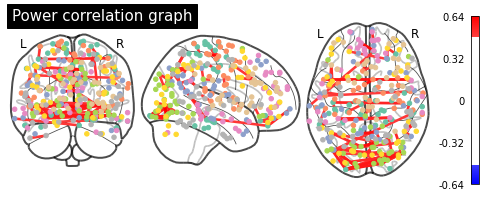

In [18]:
matrix = covariance_estimator.covariance_
print('Covariance matrix has shape {0}.'.format(matrix.shape))

from nilearn import plotting

plotting.plot_matrix(matrix, vmin=-1., vmax=1., colorbar=True,
                     title='Power correlation matrix')

# Tweak edge_threshold to keep only the strongest connections.
plotting.plot_connectome(matrix, coords, title='Power correlation graph',
                         edge_threshold='99.8%', node_size=20, colorbar=True)

Dataset Generation

In [ ]:
for i in range(0,7):
    func_filename = dataset.func[i]
    confounds_filename = dataset.confounds[i]

    spheres_masker = input_data.NiftiSpheresMasker(
        seeds=coords, smoothing_fwhm=6, radius=5.,
        detrend=True, standardize=True, low_pass=0.1, high_pass=0.01, t_r=2)

    timeseries = spheres_masker.fit_transform(func_filename,
                                            confounds=confounds_filename)


    spheres_masker = input_data.NiftiSpheresMasker(
        seeds=coords, smoothing_fwhm=6, radius=5.,
        detrend=True, standardize=True, low_pass=0.1, high_pass=0.01, t_r=2)

    timeseries = spheres_masker.fit_transform(func_filename,
                                            confounds=confounds_filename)
    
    from sklearn import covariance, preprocessing

    myScaler = preprocessing.StandardScaler()
    timeseries = myScaler.fit_transform(timeseries)
    

    try:
        from sklearn.covariance import GraphicalLassoCV
    except ImportError:
        # for Scitkit-Learn < v0.20.0
        from sklearn.covariance import GraphLassoCV as GraphicalLassoCV

    covariance_estimator = GraphicalLassoCV(cv=3, verbose=1)


    covariance_estimator.fit(timeseries)
    
    matrix = covariance_estimator.covariance_

    #Normalize matrix to greyscale
    min_ = np.min(matrix)
    max_ = np.max(matrix)
    G_matrix = (255 * (matrix-min_) / (max_-min_)).astype(np.uint8)

    from PIL import Image
    im = Image.fromarray(G_matrix)
    im.save("SCN"+str(i)+".png")